In [29]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '01731b6f-c172-4066-8ffc-dfe8baad48b0',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  
    

{'status': {'timestamp': '2023-04-10T05:18:39.698Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9128}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10149, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [30]:
type(data)

dict

In [31]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
df= pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now',utc=True)

In [33]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10149,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19342106.00000,19342106.00000,False,NaN,1,NaN,NaN,NaN,2023-04-10T05:16:00.000Z,28238.68940,12490798667.10271,31.12800,-0.27210,0.59426,1.94057,36.98401,25.03762,63.99936,546195723772.08240,46.17070,593012477504.44995,NaN,2023-04-10T05:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-10 06:12:48.025220+00:00
1,1027,Ethereum,ETH,ethereum,6711,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120457776.00000,120457776.00000,False,NaN,2,NaN,NaN,NaN,2023-04-10T05:16:00.000Z,1857.18553,6498095363.01991,30.61540,-0.21462,0.05188,4.51289,26.46648,14.28467,40.07421,223712438484.67868,18.91170,223712438484.67999,NaN,2023-04-10T05:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-10 06:12:48.025220+00:00
2,825,Tether,USDT,tether,50949,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80210538011.07312,83091735571.85529,False,NaN,3,NaN,NaN,NaN,2023-04-10T05:16:00.000Z,1.00063,20484014156.97568,14.81760,-0.00308,0.00864,0.05449,-0.28437,0.03886,0.05889,80260782113.59459,6.78410,83143784464.49001,NaN,2023-04-10T05:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-10 06:12:48.025220+00:00
3,1839,BNB,BNB,bnb,1251,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157886529.70403,157886529.70403,False,NaN,4,NaN,NaN,NaN,2023-04-10T05:16:00.000Z,312.79656,475395118.88150,4.20190,-0.04216,0.43729,0.96275,11.84640,-2.02147,14.08051,49386363352.66554,4.17440,49386363352.67000,NaN,2023-04-10T05:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-10 06:12:48.025220+00:00
4,3408,USD Coin,USDC,usd-coin,11599,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32600120798.26985,32600120798.26985,False,NaN,5,NaN,NaN,NaN,2023-04-10T05:16:00.000Z,0.99992,2664012458.89338,15.00780,-0.00290,-0.00111,0.03022,6.14889,-0.01049,-0.00260,32597596704.26200,2.75570,32597596704.26000,NaN,2023-04-10T05:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-10 06:12:48.025220+00:00
5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51688470797.00000,99989014677.00000,False,NaN,6,NaN,NaN,NaN,2023-04-10T05:16:00.000Z,0.50369,634121512.80745,19.25150,-0.23498,-0.85370,-1.25154,36.04453,28.10276,44.67420,26034935197.92017,2.20060,50368940687.31000,NaN,2023-04-10T05:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-10 06:12:48.025220+00:00
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34766124512.59800,35660688966.54200,False,NaN,7,NaN,NaN,NaN,2023-04-10T05:16:00.000Z,0.38598,199737754.50805,4.88800,-0.30329,-0.72553,1.80993,21.56986,0.56692,22.64459,13419016769.29244,1.13420,17369084506.37000,NaN,2023-04-10T05:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-10 06:12:48.025220+00:00
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138875986383.70520,138875986383.70520,False,NaN,8,NaN,NaN,NaN,2023-04-10T05:16:00.000Z,0.08299,473674665.98529,5.26330,-0.29192,0.70552,7.05788,24.58386,-5.00818,9.49331,11524757962.42006,0.97430,11524757962.42000,NaN,2023

In [34]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '01731b6f-c172-4066-8ffc-dfe8baad48b0',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df= pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now',utc=True)
    df
    
    if not os.path.isfile(r'C:\Users\sohom\OneDrive\Desktop\data_analysis\crypto analysis\API.csv'):
        df.to_csv(r'C:\Users\sohom\OneDrive\Desktop\data_analysis\crypto analysis\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\sohom\OneDrive\Desktop\data_analysis\crypto analysis\API.csv', mode='a', header=False)

In [35]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('Api_runner completed successfully')
    sleep(60)
exit()

{'status': {'timestamp': '2023-04-10T05:19:31.018Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 9128}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10149, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

Api_runner completed successfully
{'status': {'timestamp': '2023-04-10T05:20:32.252Z', 'error_code': 0, 'error_message': None, 'elapsed': 42, 'credit_count': 1, 'notice': None, 'total_count': 9128}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10149, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'm

{'status': {'timestamp': '2023-04-10T05:21:33.114Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 9128}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10149, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-10T05:22:33.989Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 9128}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10149, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-10T05:23:34.911Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9128}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10149, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [36]:
df1 = pd.read_csv(r'C:\Users\sohom\OneDrive\Desktop\data_analysis\crypto analysis\API.csv')
df1

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10144,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19339418.00000,19339418.00000,False,NaN,1,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,27902.13222,13043446635.49149,-15.73700,-0.15966,-0.49185,0.33154,26.81085,22.15671,64.63664,539610998149.43781,45.79340,585944776680.35999,NaN,2023-04-07T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:30:03.228822+00:00
1,1,1027,Ethereum,ETH,ethereum,6700,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120457776.00000,120457776.00000,False,NaN,2,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,1863.49182,9442238121.27088,2.68420,-0.28397,-1.34113,4.20182,20.05145,14.28755,47.23102,224472080001.85760,19.04950,224472080001.85999,NaN,2023-04-07T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:30:03.228822+00:00
2,2,825,Tether,USDT,tether,50853,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80195385809.39134,83091735571.87251,False,NaN,3,NaN,NaN,NaN,2023-04-07T07:33:00.000Z,1.00017,22715919388.87375,-15.30620,-0.01035,-0.00788,0.01631,0.01765,-0.00379,0.03827,80209314141.79768,6.80690,83106166942.23000,NaN,2023-04-07T07:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-07 08:30:03.228822+00:00
3,3,1839,BNB,BNB,bnb,1243,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157887127.32039,157887127.32039,False,NaN,4,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,311.10798,507192128.36274,-10.70510,-0.14035,-0.80284,-1.14224,8.72447,-4.24889,19.27153,49119944618.24238,4.16660,49119944618.24000,NaN,2023-04-07T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:30:03.228822+00:00
4,4,3408,USD Coin,USDC,usd-coin,11505,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32762839295.32017,32762839295.32017,False,NaN,5,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,0.99961,3660463791.81491,-7.28210,-0.00031,-0.02976,-0.01624,-0.01801,-0.05560,-0.04256,32750021417.25453,2.77810,32750021417.25000,NaN,2023-04-07T07:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-07 08:30:03.228822+00:00
5,5,52,XRP,XRP,xrp,927,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51688470797.00000,99989014677.00000,False,NaN,6,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,0.50725,1068723190.86539,-15.00830,-0.36724,1.12254,-5.85352,34.90473,26.88986,48.07599,26219224228.51920,2.22410,50725478669.11000,NaN,2023-04-07T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:30:03.228822+00:00
6,6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34754464063.43400,35660688966.54200,False,NaN,7,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,0.37890,258029248.23943,-6.59850,-0.48961,-2.55985,-0.66796,17.34414,-3.34427,36.93958,13168567940.83076,1.11750,17050631431.28000,NaN,2023-04-07T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:30:03.228822+00:00
7,7,74,Dogecoin,DOGE,dogecoin,680,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,138836666383.70520,138836666383.70520,False,NaN,8,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,0.08263,1449616028.68441,10.99330,-0.04383,-9.97359,11.55765,13.31182,-10.62359,13.99734,114715

In [37]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df1

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10144,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19339418.00000,19339418.00000,False,NaN,1,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,27902.13222,13043446635.49149,-15.73700,-0.15966,-0.49185,0.33154,26.81085,22.15671,64.63664,539610998149.43781,45.79340,585944776680.35999,NaN,2023-04-07T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:30:03.228822+00:00
1,1,1027,Ethereum,ETH,ethereum,6700,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120457776.00000,120457776.00000,False,NaN,2,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,1863.49182,9442238121.27088,2.68420,-0.28397,-1.34113,4.20182,20.05145,14.28755,47.23102,224472080001.85760,19.04950,224472080001.85999,NaN,2023-04-07T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:30:03.228822+00:00
2,2,825,Tether,USDT,tether,50853,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80195385809.39134,83091735571.87251,False,NaN,3,NaN,NaN,NaN,2023-04-07T07:33:00.000Z,1.00017,22715919388.87375,-15.30620,-0.01035,-0.00788,0.01631,0.01765,-0.00379,0.03827,80209314141.79768,6.80690,83106166942.23000,NaN,2023-04-07T07:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-07 08:30:03.228822+00:00
3,3,1839,BNB,BNB,bnb,1243,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157887127.32039,157887127.32039,False,NaN,4,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,311.10798,507192128.36274,-10.70510,-0.14035,-0.80284,-1.14224,8.72447,-4.24889,19.27153,49119944618.24238,4.16660,49119944618.24000,NaN,2023-04-07T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:30:03.228822+00:00
4,4,3408,USD Coin,USDC,usd-coin,11505,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32762839295.32017,32762839295.32017,False,NaN,5,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,0.99961,3660463791.81491,-7.28210,-0.00031,-0.02976,-0.01624,-0.01801,-0.05560,-0.04256,32750021417.25453,2.77810,32750021417.25000,NaN,2023-04-07T07:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-07 08:30:03.228822+00:00
5,5,52,XRP,XRP,xrp,927,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51688470797.00000,99989014677.00000,False,NaN,6,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,0.50725,1068723190.86539,-15.00830,-0.36724,1.12254,-5.85352,34.90473,26.88986,48.07599,26219224228.51920,2.22410,50725478669.11000,NaN,2023-04-07T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:30:03.228822+00:00
6,6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34754464063.43400,35660688966.54200,False,NaN,7,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,0.37890,258029248.23943,-6.59850,-0.48961,-2.55985,-0.66796,17.34414,-3.34427,36.93958,13168567940.83076,1.11750,17050631431.28000,NaN,2023-04-07T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:30:03.228822+00:00
7,7,74,Dogecoin,DOGE,dogecoin,680,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,138836666383.70520,138836666383.70520,False,NaN,8,NaN,NaN,NaN,2023-04-07T07:34:00.000Z,0.08263,1449616028.68441,10.99330,-0.04383,-9.97359,11.55765,13.31182,-10.62359,13.99734,114715

In [38]:
df2 = df1.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.29553,0.13914,1.25415,33.02285,23.92821,64.12225
Ethereum,-0.34260,-0.53619,4.28316,23.97392,14.21200,42.62169
Tether,-0.00407,-0.00206,0.03392,-0.18092,0.01736,0.04562
BNB,-0.11164,-0.05356,0.13222,10.66883,-2.85465,15.96205
USD Coin,-0.01475,-0.01753,0.00233,3.43039,-0.03876,-0.03204
XRP,-0.31272,-0.15381,-3.04810,35.59943,27.63431,45.87915
Cardano,-0.36935,-1.37786,0.82482,20.02695,-0.85361,27.95505
Dogecoin,-0.23797,-3.30460,8.66497,20.38199,-7.17476,11.11526
Polygon,-0.36104,-1.60818,1.24202,1.60506,-10.76630,32.18084


In [39]:
df3 = df2.stack()
df3

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.29553
                 quote.USD.percent_change_24h     0.13914
                 quote.USD.percent_change_7d      1.25415
                 quote.USD.percent_change_30d    33.02285
                 quote.USD.percent_change_60d    23.92821
                 quote.USD.percent_change_90d    64.12225
Ethereum         quote.USD.percent_change_1h     -0.34260
                 quote.USD.percent_change_24h    -0.53619
                 quote.USD.percent_change_7d      4.28316
                 quote.USD.percent_change_30d    23.97392
                 quote.USD.percent_change_60d    14.21200
                 quote.USD.percent_change_90d    42.62169
Tether           quote.USD.percent_change_1h     -0.00407
                 quote.USD.percent_change_24h    -0.00206
                 quote.USD.percent_change_7d      0.03392
                 quote.USD.percent_change_30d    -0.18092
                 quote.USD

In [40]:
type(df3)

pandas.core.series.Series

In [41]:
df4 = df3.to_frame(name='values')
df4

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.29553
                quote.USD.percent_change_24h   0.13914
                quote.USD.percent_change_7d    1.25415
                quote.USD.percent_change_30d  33.02285
                quote.USD.percent_change_60d  23.92821
                quote.USD.percent_change_90d  64.12225
Ethereum        quote.USD.percent_change_1h   -0.34260
                quote.USD.percent_change_24h  -0.53619
                quote.USD.percent_change_7d    4.28316
                quote.USD.percent_change_30d  23.97392
                quote.USD.percent_change_60d  14.21200
                quote.USD.percent_change_90d  42.62169
Tether          quote.USD.percent_change_1h   -0.00407
                quote.USD.percent_change_24h  -0.00206
                quote.USD.percent_change_7d    0.03392
                quote.USD.percent_change_30d  -0.18092
                quote.USD.percent_change_60d   0.01736
                quote.USD.percent_change_90d   0.04562
BNB             quote.USD.percent_change_1h   -0.11164
                quote.USD.percent_change_24h  -0.05356
                quote.USD.percent_change_7d    0.13222
                quote.USD.percent_change_30d  10.66883
                quote.USD.percent_change_60d  -2.85465
                quote.USD.percent_change_90d  15.96205
USD Coin        quote.USD.percent_change_1h   -0.01475
                quote.USD.percent_change_24h  -0.01753
                quote.USD.percent_change_7d    0.00233
                quote.USD.percent_change_30d   3.43039
                quote.USD.percent_change_60d  -0.03876
                quote.USD.percent_change_90d  -0.03204
XRP             quote.USD.percent_change_1h   -0.31272
                quote.USD.percent_change_24h  -0.15381
                quote.USD.percent_change_7d   -3.04810
                quote.USD.percent_change_30d  35.59943
                quote.USD.percent_change_60d  27.63431
                quote.USD.percent_change_90d  45.87915
Cardano         quote.USD.percent_change_1h   -0.36935
                quote.USD.percent_change_24h  -1.37786
                quote.USD.percent_change_7d    0.82482
                quote.USD.percent_change_30d  20.02695
                quote.USD.percent_change_60d  -0.85361
                quote.USD.percent_change_90d  27.95505
Dogecoin        quote.USD.percent_change_1h   -0.23797
                quote.USD.percent_change_24h  -3.30460
                quote.USD.percent_change_7d    8.66497
                quote.USD.percent_change_30d  20.38199
                quote.USD.percent_change_60d  -7.17476
                quote.USD.percent_change_90d  11.11526
Polygon         quote.USD.percent_change_1h   -0.36104
                quote.USD.percent_change_24h  -1.60818
                quote.USD.percent_change_7d    1.24202
                quote.USD.percent_change_30d   1.60506
                quote.USD.percent_change_60d -10.76630
                quote.USD.percent_change_90d  32.18084
Solana          quote.USD.percent_change_1h   -0.34937
                quote.USD.percent_change_24h  -0.70827
                quote.USD.percent_change_7d    0.73857
                quote.USD.percent_change_30d   9.17346
                quote.USD.percent_change_60d -11.21774
                quote.USD.percent_change_90d  36.14384
Polkadot        quote.USD.percent_change_1h   -0.25682
                quote.USD.percent_change_24h  -1.44263
                quote.USD.percent_change_7d   -0.14675
                quote.USD.percent_change_30d   9.79729
                quote.USD.percent_change_60d  -7.35147
                quote.USD.percent_change_90d  28.23115
Binance USD     quote.USD.percent_change_1h   -0.00066
                quote.USD.percent_change_24h   0.00646
                quote.USD.percent_change_7d    0.04234
                quote.USD.percent_change_30d   0.06255
                quote.USD.percent_change_60d  -0.02765
                quote.USD.percent

In [42]:
type(df4)

pandas.core.frame.DataFrame

In [43]:
df5 = df4
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.29553
                quote.USD.percent_change_24h   0.13914
                quote.USD.percent_change_7d    1.25415
                quote.USD.percent_change_30d  33.02285
                quote.USD.percent_change_60d  23.92821
                quote.USD.percent_change_90d  64.12225
Ethereum        quote.USD.percent_change_1h   -0.34260
                quote.USD.percent_change_24h  -0.53619
                quote.USD.percent_change_7d    4.28316
                quote.USD.percent_change_30d  23.97392
                quote.USD.percent_change_60d  14.21200
                quote.USD.percent_change_90d  42.62169
Tether          quote.USD.percent_change_1h   -0.00407
                quote.USD.percent_change_24h  -0.00206
                quote.USD.percent_change_7d    0.03392
                quote.USD.percent_change_30d  -0.18092
                quote.USD.percent_change_60d   0.01736
                quote.USD.percent_change_90d   0.04562
BNB             quote.USD.percent_change_1h   -0.11164
                quote.USD.percent_change_24h  -0.05356
                quote.USD.percent_change_7d    0.13222
                quote.USD.percent_change_30d  10.66883
                quote.USD.percent_change_60d  -2.85465
                quote.USD.percent_change_90d  15.96205
USD Coin        quote.USD.percent_change_1h   -0.01475
                quote.USD.percent_change_24h  -0.01753
                quote.USD.percent_change_7d    0.00233
                quote.USD.percent_change_30d   3.43039
                quote.USD.percent_change_60d  -0.03876
                quote.USD.percent_change_90d  -0.03204
XRP             quote.USD.percent_change_1h   -0.31272
                quote.USD.percent_change_24h  -0.15381
                quote.USD.percent_change_7d   -3.04810
                quote.USD.percent_change_30d  35.59943
                quote.USD.percent_change_60d  27.63431
                quote.USD.percent_change_90d  45.87915
Cardano         quote.USD.percent_change_1h   -0.36935
                quote.USD.percent_change_24h  -1.37786
                quote.USD.percent_change_7d    0.82482
                quote.USD.percent_change_30d  20.02695
                quote.USD.percent_change_60d  -0.85361
                quote.USD.percent_change_90d  27.95505
Dogecoin        quote.USD.percent_change_1h   -0.23797
                quote.USD.percent_change_24h  -3.30460
                quote.USD.percent_change_7d    8.66497
                quote.USD.percent_change_30d  20.38199
                quote.USD.percent_change_60d  -7.17476
                quote.USD.percent_change_90d  11.11526
Polygon         quote.USD.percent_change_1h   -0.36104
                quote.USD.percent_change_24h  -1.60818
                quote.USD.percent_change_7d    1.24202
                quote.USD.percent_change_30d   1.60506
                quote.USD.percent_change_60d -10.76630
                quote.USD.percent_change_90d  32.18084
Solana          quote.USD.percent_change_1h   -0.34937
                quote.USD.percent_change_24h  -0.70827
                quote.USD.percent_change_7d    0.73857
                quote.USD.percent_change_30d   9.17346
                quote.USD.percent_change_60d -11.21774
                quote.USD.percent_change_90d  36.14384
Polkadot        quote.USD.percent_change_1h   -0.25682
                quote.USD.percent_change_24h  -1.44263
                quote.USD.percent_change_7d   -0.14675
                quote.USD.percent_change_30d   9.79729
                quote.USD.percent_change_60d  -7.35147
                quote.USD.percent_change_90d  28.23115
Binance USD     quote.USD.percent_change_1h   -0.00066
                quote.USD.percent_change_24h   0.00646
                quote.USD.percent_change_7d    0.04234
                quote.USD.percent_change_30d   0.06255
                quote.USD.percent_change_60d  -0.02765
                quote.USD.percent

In [50]:
df3.count()

120

In [52]:
index = pd.Index(range(120))
df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.29553
1,Bitcoin,quote.USD.percent_change_24h,0.13914
2,Bitcoin,quote.USD.percent_change_7d,1.25415
3,Bitcoin,quote.USD.percent_change_30d,33.02285
4,Bitcoin,quote.USD.percent_change_60d,23.92821
5,Bitcoin,quote.USD.percent_change_90d,64.12225
6,Ethereum,quote.USD.percent_change_1h,-0.34260
7,Ethereum,quote.USD.percent_change_24h,-0.53619
8,Ethereum,quote.USD.percent_change_7d,4.28316
9,Ethereum,quote.USD.percent_change_30d,23.97392


In [54]:
df6 = df5.rename(columns={'level_1':'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.29553
1,Bitcoin,quote.USD.percent_change_24h,0.13914
2,Bitcoin,quote.USD.percent_change_7d,1.25415
3,Bitcoin,quote.USD.percent_change_30d,33.02285
4,Bitcoin,quote.USD.percent_change_60d,23.92821
5,Bitcoin,quote.USD.percent_change_90d,64.12225
6,Ethereum,quote.USD.percent_change_1h,-0.34260
7,Ethereum,quote.USD.percent_change_24h,-0.53619
8,Ethereum,quote.USD.percent_change_7d,4.28316
9,Ethereum,quote.USD.percent_change_30d,23.97392


In [55]:
import matplotlib.pyplot as plt

In [56]:
import seaborn as sns

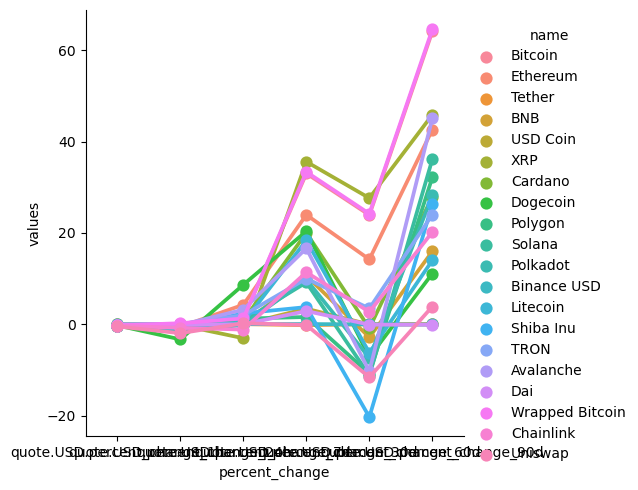

In [57]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [58]:
df7 = df6
df7 = df7.replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24d', '7d', '30d', '60d', '90d'])

df7

,name,percent_change,values
0,Bitcoin,1h,-0.29553
1,Bitcoin,24d,0.13914
2,Bitcoin,7d,1.25415
3,Bitcoin,30d,33.02285
4,Bitcoin,60d,23.92821
5,Bitcoin,90d,64.12225
6,Ethereum,1h,-0.34260
7,Ethereum,24d,-0.53619
8,Ethereum,7d,4.28316
9,Ethereum,30d,23.97392


In [59]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

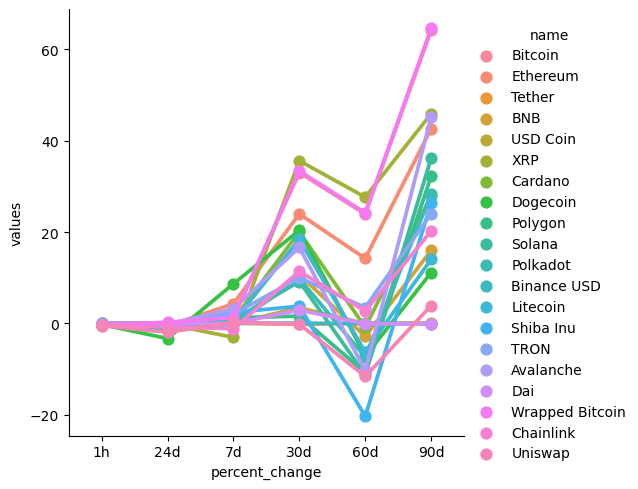

In [60]:
plt.show()

In [69]:
df10 = df1[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,27902.13222,2023-04-07 08:30:03.228822+00:00
20,Bitcoin,27848.56910,2023-04-07 08:31:04.244479+00:00
40,Bitcoin,27887.09877,2023-04-07 08:32:05.111302+00:00
60,Bitcoin,28231.33921,2023-04-10 06:13:29.690629+00:00
80,Bitcoin,28230.17589,2023-04-10 06:14:30.917180+00:00
100,Bitcoin,28230.17589,2023-04-10 06:15:31.739822+00:00
120,Bitcoin,28218.10232,2023-04-10 06:16:32.613128+00:00
140,Bitcoin,28218.10232,2023-04-10 06:17:33.533794+00:00


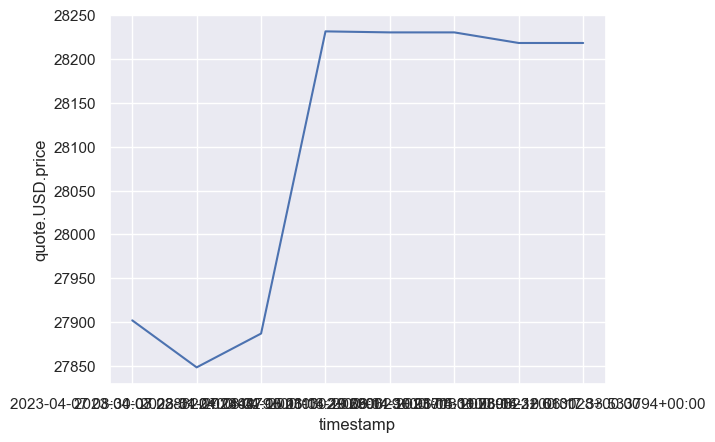

In [67]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)
plt.show()